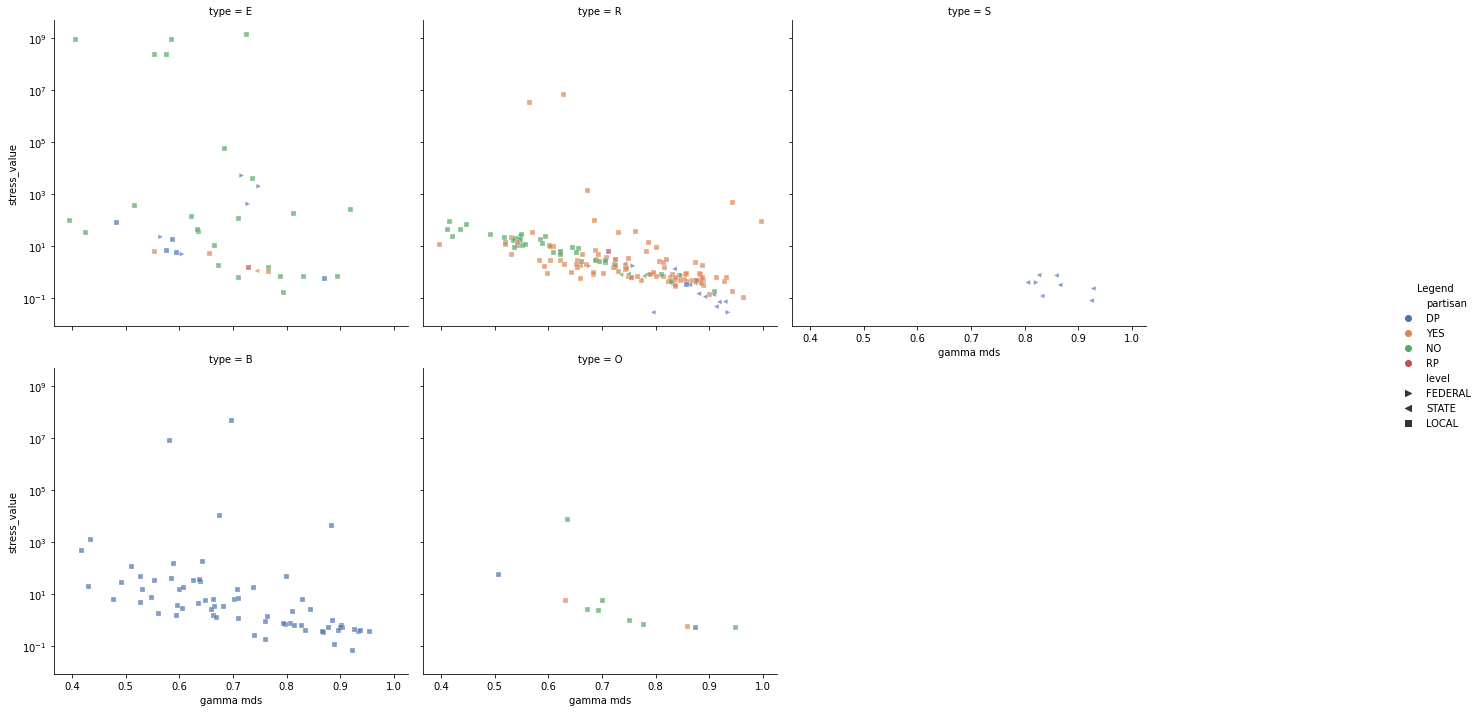

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged_data = pd.read_csv('filenames_with_index.csv')

# Calculate z-scores to identify outliers
merged_data['z_score_gamma_mds'] = np.abs((merged_data['gamma mds'] - merged_data['gamma mds'].mean()) / merged_data['gamma mds'].std())
merged_data['z_score_stress_value'] = np.abs((merged_data['stress_value'] - merged_data['stress_value'].mean()) / merged_data['stress_value'].std())

# Filter outliers based on z-scores and a minimum stress value threshold
outliers = merged_data[(merged_data['z_score_gamma_mds'] > 2) | (merged_data['z_score_stress_value'] > 2) | (merged_data['stress_value'] < 1e-2)]
outliers.to_csv('filtered_outliers.csv', index=False)

# Filter the data for plotting
filtered_data = merged_data.drop(outliers.index)

# Define custom marker styles based on the 'level'
custom_marker_dict = {'FEDERAL': '>',
                      'STATE': '<',
                      'LOCAL': 's'}

# Create FacetGrid based on 'type'
g = sns.FacetGrid(filtered_data, col='type', col_wrap=3, height=5, aspect=1)

# Map the scatterplot onto the FacetGrid, differentiating by 'partisan' (color) and 'level' (custom marker style)
g.map_dataframe(sns.scatterplot, x='gamma mds', y='stress_value', hue='partisan', style='level', markers=custom_marker_dict, alpha=.7, palette='deep', s=25)

# Add legend outside the plot at a more convenient location
g.add_legend(title='Legend', bbox_to_anchor=(1.2, 0.5), loc='center left')

# Set y-axis to log scale
plt.yscale('log')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

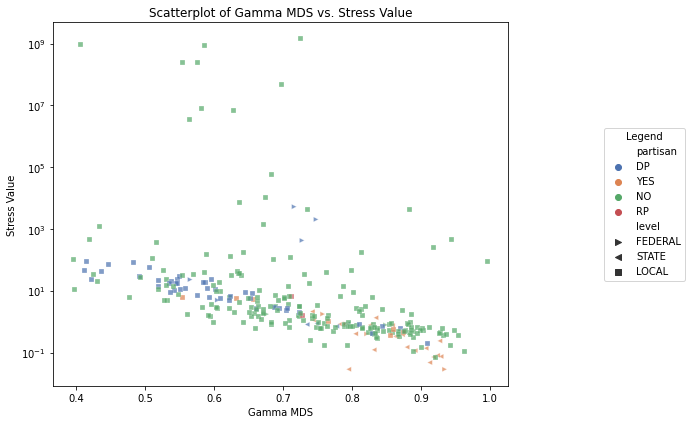

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged_data = pd.read_csv('filenames_with_index.csv')

# Calculate z-scores to identify outliers
merged_data['z_score_gamma_mds'] = np.abs((merged_data['gamma mds'] - merged_data['gamma mds'].mean()) / merged_data['gamma mds'].std())
merged_data['z_score_stress_value'] = np.abs((merged_data['stress_value'] - merged_data['stress_value'].mean()) / merged_data['stress_value'].std())

# Filter outliers based on z-scores and a minimum stress value threshold
outliers = merged_data[(merged_data['z_score_gamma_mds'] > 2) | (merged_data['z_score_stress_value'] > 2) | (merged_data['stress_value'] < 1e-2)]
outliers.to_csv('filtered_outliers.csv', index=False)

# Filter the data for plotting
filtered_data = merged_data.drop(outliers.index)

# Define custom marker styles based on the 'level'
custom_marker_dict = {'FEDERAL': '>', 'STATE': '<', 'LOCAL': 's'}

# Create a single scatterplot without facets
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Map the scatterplot, differentiating by 'partisan' (color) and 'level' (custom marker style)
sns.scatterplot(data=filtered_data, x='gamma mds', y='stress_value', hue='partisan', style='level', markers=custom_marker_dict, alpha=.7, palette='deep', s=25)

# Add legend outside the plot at a more convenient location
plt.legend(title='Legend', bbox_to_anchor=(1.2, 0.5), loc='center left')

# Set y-axis to log scale
plt.yscale('log')

# Add labels and title if needed
plt.xlabel('Gamma MDS')
plt.ylabel('Stress Value')
plt.title('Scatterplot of Gamma MDS vs. Stress Value')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

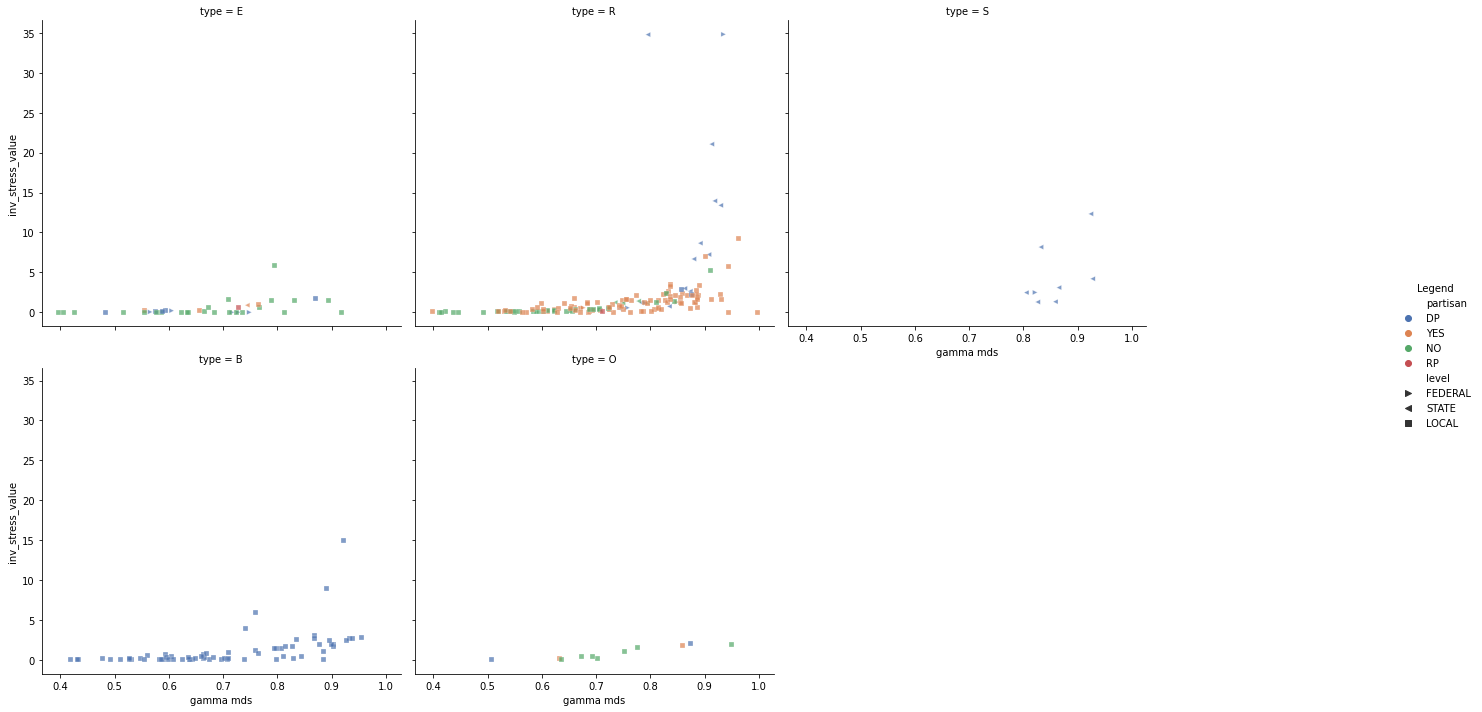

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'filenames_with_index.csv'
merged_data = pd.read_csv(file_path)

# Calculate 1/stress_value for the plot
merged_data['inv_stress_value'] = 1 / merged_data['stress_value']

# Calculate z-scores to identify outliers, if not already calculated
if 'z_score_gamma_mds' not in merged_data.columns:
    merged_data['z_score_gamma_mds'] = np.abs((merged_data['gamma mds'] - merged_data['gamma mds'].mean()) / merged_data['gamma mds'].std())
    
if 'z_score_stress_value' not in merged_data.columns:
    merged_data['z_score_stress_value'] = np.abs((merged_data['stress_value'] - merged_data['stress_value'].mean()) / merged_data['stress_value'].std())

# Filter outliers based on z-scores and a minimum stress value threshold
outliers = merged_data[(merged_data['z_score_gamma_mds'] > 2) | (merged_data['z_score_stress_value'] > 2) | (merged_data['stress_value'] < 1e-2)]
filtered_data = merged_data.drop(outliers.index)

# Define custom marker styles based on the 'level'
custom_marker_dict = {'FEDERAL': '>', 'STATE': '<', 'LOCAL': 's'}

# Create a new FacetGrid based on 'type'
g_new = sns.FacetGrid(filtered_data, col='type', col_wrap=3, height=5, aspect=1)

# Map the scatterplot onto the new FacetGrid, differentiating by 'partisan' (color) and 'level' (custom marker style)
g_new.map_dataframe(sns.scatterplot, x='gamma mds', y='inv_stress_value', hue='partisan', style='level', markers=custom_marker_dict, alpha=.7, palette='deep', s=25)

# Add legend outside the plot at a more convenient location
g_new.add_legend(title='Legend', bbox_to_anchor=(1.2, 0.5), loc='center left')

# Tight layout
plt.tight_layout()

# Show the new plot
plt.show()

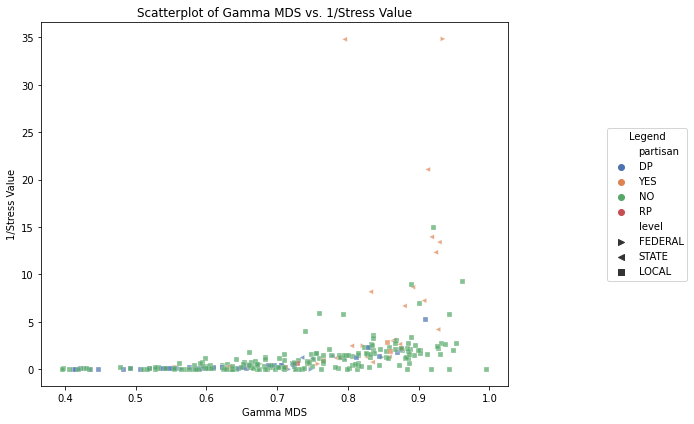

In [4]:
# Calculate 1/stress_value for the new plot in the collated format
filtered_data['inv_stress_value'] = 1 / filtered_data['stress_value']

# Create a single scatterplot without facets for the new plot
plt.figure(figsize=(10, 6))

# Map the scatterplot, differentiating by 'partisan' (color) and 'level' (custom marker style)
sns.scatterplot(data=filtered_data, x='gamma mds', y='inv_stress_value', hue='partisan', style='level', markers=custom_marker_dict, alpha=.7, palette='deep', s=25)

# Add legend outside the plot at a more convenient location
plt.legend(title='Legend', bbox_to_anchor=(1.2, 0.5), loc='center left')

# Add labels and title
plt.xlabel('Gamma MDS')
plt.ylabel('1/Stress Value')
plt.title('Scatterplot of Gamma MDS vs. 1/Stress Value')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()